# NBA球員資料視覺化

## 導入模組

In [ ]:
# Data Analysts
import pandas as pd

# EDA Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

## 資料收集

In [ ]:
# Import csv dataset from a website
data = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/nba.csv')
data.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


In [ ]:
# Check the data distribution
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [ ]:
# Check the data infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


## 資料前處理

In [ ]:
# Check the missing values percentage for each feature
missing_data_sum = data.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum, 'percentage_of_missing_values': (missing_data_sum / data.shape[0]) * 100})
missing_data

,total_missing_values,percentage_of_missing_values
Name,1,0.218341
Team,1,0.218341
Number,1,0.218341
Position,1,0.218341
Age,1,0.218341
Height,1,0.218341
Weight,1,0.218341
College,85,18.558952
Salary,12,2.620087


In [ ]:
# Height feature - Convert US units to Metric units (ft & in to cm).
def Height_t(ht):
  h_inch = 0
  if ht.lower() != 'nan':
    ht = ht.replace('-', ' ')
    h_ft = int(ht.split()[0])
    h_inch = int(ht.split()[1])
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

data.Height = data.Height.astype(str).apply(Height_t)
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,188.0,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,198.1,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,195.6,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,195.6,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,208.3,231.0,NaN,5000000.0


In [ ]:
# Fill NaN with mean value
data.Height.fillna(value=data.Height.mean(), inplace=True)
data.Number.fillna(value=data.Number.mean(), inplace=True)
data.Age.fillna(value=data.Age.mean(), inplace=True)
data.Weight.fillna(value=data.Weight.mean(), inplace=True)
data.Salary.fillna(value=data.Salary.mean(), inplace=True)

In [ ]:
# Check the missing values percentage for each feature
missing_data_sum = data.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum, 'percentage_of_missing_values': (missing_data_sum / data.shape[0]) * 100})
missing_data

,total_missing_values,percentage_of_missing_values
Name,1,0.218341
Team,1,0.218341
Number,0,0.000000
Position,1,0.218341
Age,0,0.000000
Height,0,0.000000
Weight,0,0.000000
College,85,18.558952
Salary,0,0.000000


In [ ]:
# Drop NaN
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      373 non-null    object 
 1   Team      373 non-null    object 
 2   Number    373 non-null    float64
 3   Position  373 non-null    object 
 4   Age       373 non-null    float64
 5   Height    373 non-null    float64
 6   Weight    373 non-null    float64
 7   College   373 non-null    object 
 8   Salary    373 non-null    float64
dtypes: float64(5), object(4)
memory usage: 29.1+ KB


## 資料視覺化

In [ ]:
# Ddefine plot function
def plot_dist(df, indipendent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) 
  return None

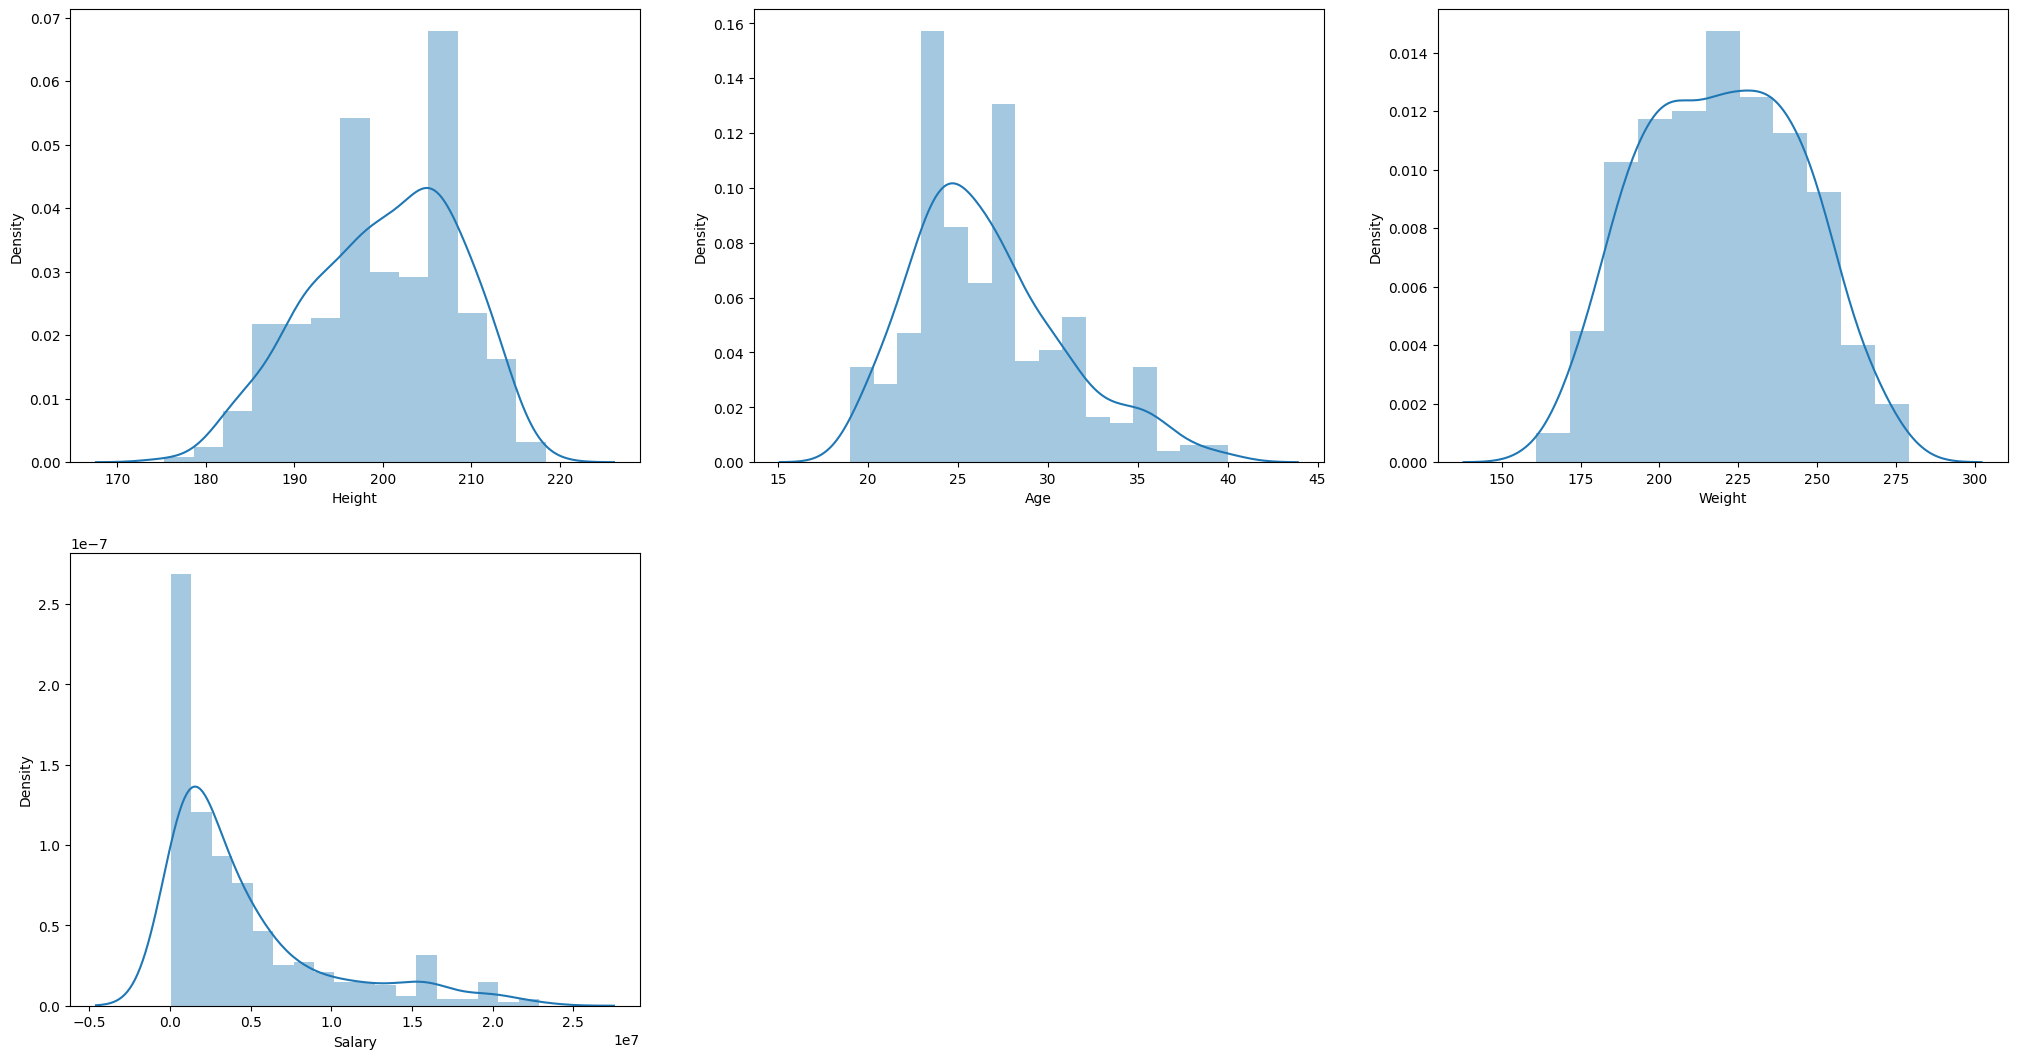

In [ ]:
# Plot the data
plot_dist(data, ['Height', 'Age', 'Weight', 'Salary'])